**Autor:R.** Hurtado                  

**Materia:** Procesamiento de Datos 
                            
**Topico:** Introduccion a PySpark en el Ambiente Databricks

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql import SQLContext

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
df00 = spark.read.table("stroke_pyspark_2_csv")
df00.columns

Out[109]: ['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [0]:
df00.show(10)


+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [0]:
df01 = df00.withColumn("age", df00.age.cast("int"))
df01 = df00.withColumn("bmi", df00.bmi.cast("double"))
df01.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [0]:
df01.groupBy('gender').count().show()


+------+-----+
|gender|count|
+------+-----+
|Female| 2994|
| Other|    1|
|  Male| 2115|
+------+-----+



In [0]:
df01 = df01.filter(df01['gender'] != 'hombres')


In [0]:
df01.show(10)


+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

REVISION DE DATOS NULOS

In [0]:
df01.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df01.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [0]:
### promedio de IMC por Estrato  de Edades y female

#avg10F = df01.where((col('gender' == lit('Female')) & (col('age') < 10))).select(mean(col('bmi'))).collect()
#avg20F = df01.where((col('gender') == lit('Female')) & (col('age') > 10) & (col('age') < 20)).select(mean(col('bmi'))).collect()
#avg30F = df01.where((col('gender') == lit('Female')) & (col('age') > 20) & (col('age') < 30)).select(mean(col('bmi'))).collect()
#avg40F = df01.where((col('gender') == lit('Female')) & (col('age') > 30) & (col('age') < 40)).select(mean(col('bmi'))).collect()
#avg50F = df01.where((col('gender') == lit('Female')) & (col('age') > 40) & (col('age') < 50)).select(mean(col('bmi'))).collect()
#avg60F = df01.where((col('gender') == lit('Female')) & (col('age') > 50) & (col('age') < 60)).select(mean(col('bmi'))).collect()
#avg70F = df01.where((col('gender') == lit('Female')) & (col('age') > 60) & (col('age') < 70)).select(mean(col('bmi'))).collect()
#avg80F = df01.where((col('gender') == lit('Female')) & (col('age') > 70) & (col('age') < 80)).select(mean(col('bmi'))).collect()
#avg90F = df01.where((col('gender') == lit('Female')) & (col('age') > 80) & (col('age') < 90)).select(mean(col('bmi'))).collect()

In [0]:
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 10) avg10F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 20) avg20F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 30) avg30F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 40) avg40F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 50) avg50F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 60) avg60F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 70) avg70F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 80) avg80F[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Female') & (df01['bmi'].isNull()) & (df01['age'] < 90) avg90F[0][0]).otherwise(df01['bmi']))


In [0]:
### promedio de bmi por Estrato  de Edades y Male

#avg10M = df02.where((col('gender' == lit('Male')) & (col('age') < 10))).select(mean(col('bmi'))).collect()
#avg20M = df02.where((col('gender') == lit('Male')) & (col('age') > 10) & (col('age') < 20)).select(mean(col('bmi'))).collect()
#avg30M = df02.where((col('gender') == lit('Male')) & (col('age') > 20) & (col('age') < 30)).select(mean(col('bmi'))).collect()
#avg40M = df02.where((col('gender') == lit('Male')) & (col('age') > 30) & (col('age') < 40)).select(mean(col('bmi'))).collect()
#avg50M = df02.where((col('gender') == lit('Male')) & (col('age') > 40) & (col('age') < 50)).select(mean(col('bmi'))).collect()
#avg60M = df02.where((col('gender') == lit('Male')) & (col('age') > 50) & (col('age') < 60)).select(mean(col('bmi'))).collect()
#avg70M = df02.where((col('gender') == lit('Male')) & (col('age') > 60) & (col('age') < 70)).select(mean(col('bmi'))).collect()
#avg80M = df02.where((col('gender') == lit('Male')) & (col('age') > 70) & (col('age') < 80)).select(mean(col('bmi'))).collect()

In [0]:
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 10) avg10M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 20) avg20M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 30) avg30M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 40) avg40M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 50) avg50M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 60) avg60M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 70) avg70M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 80) avg80M[0][0]).otherwise(df01['bmi']))
#df02 = df01.withColumn("bmi", when((df01['gender'] == 'Male') & (df01['bmi'].isNull()) & (df01['age'] < 90) avg90M[0][0]).otherwise(df01['bmi']))

In [0]:
#recolectar Promedios

rangos = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]



def calcular_promedio_imc(df, gender, rangos):
    promedios = {}
    for start, end in rangos:
        key = f'avg{end}{gender[0]}'
        
        avg = df.filter((col('gender') == gender) & (col('age') >= start) & (col('age') < end)) \
                .agg(F.mean(col('bmi'))).collect()[0][0]  
        
        promedios[key] = avg  
        
    return promedios

# Calcular los promedios para mujeres y hombres
resultadosF = calcular_promedio_imc(df01, 'Female', rangos)
print(resultadosF)

resultadosM = calcular_promedio_imc(df01, 'Male', rangos)
print(resultadosM)

{'avg10F': 18.687962962962963, 'avg20F': 25.202371541501993, 'avg30F': 28.110054347826086, 'avg40F': 31.114250614250615, 'avg50F': 31.147260273972595, 'avg60F': 31.64794816414686, 'avg70F': 30.777976190476185, 'avg80F': 29.53778501628664, 'avg90F': 28.23577981651375}
{'avg10M': 19.03168724279836, 'avg20M': 24.584051724137947, 'avg30M': 28.228823529411773, 'avg40M': 31.372321428571432, 'avg50M': 31.936329588014974, 'avg60M': 31.889181286549697, 'avg70M': 31.3031496062992, 'avg80M': 29.140291262135918, 'avg90M': 28.34931506849315}


In [0]:
#remplazar NULL por promedios por su rango de edad

promedios = {**resultadosF, **resultadosM}

def remplazar_nulls(df, promedios, rangos):
    for start, end in rangos:
        for gender in ['Female', 'Male']:
            key = f'avg{end}{gender[0]}'
            avg_bmi = promedios.get(key, None)
            
            # Asegurarse de que el promedio no sea None
            if avg_bmi is not None:
                # Reemplazar los valores NULL de BMI con el promedio calculado para ese grupo
                df = df.withColumn(
                    'bmi',
                    F.when(
                        (F.col('gender') == gender) & 
                        (F.col('age') >= start) & (F.col('age') < end) & 
                        F.col('bmi').isNull(), avg_bmi
                    ).otherwise(F.col('bmi'))
                )
    return df


df02 = remplazar_nulls(df01, promedios, rangos)

In [0]:
df02.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df02.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



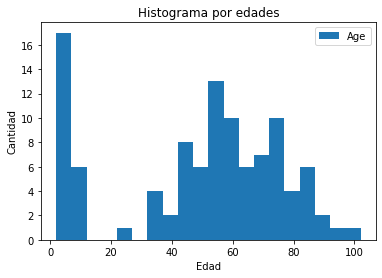

In [0]:
##grafica edades

clases, cantidad = df02.groupby('age').count().select('count').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(clases[:-1], bins=clases, weights=cantidad)
plt.ylabel('Cantidad')
plt.xlabel('Edad')
plt.title('Histograma por edades')
plt.legend(['Age'], loc='upper right')
plt.show()

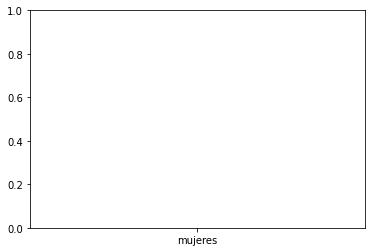

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-4259709632776535>:4
      2 genero = df02.groupby('gender').count().select('count').rdd.flatMap(lambda x: x).collect()
      3 categoria = ['mujeres', 'hombres']
----> 4 grafica = plt.bar(categoria, genero)
      5 grafica[0].set_color('r')
      6 plt.ylabel('Cantidad')

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:2387, in bar(x, height, width, bottom, align, data, **kwargs)
   2383 @_copy_docstring_and_deprecators(Axes.bar)
   2384 def bar(
   2385         x, height, width=0.8, bottom=None, *, align='center',
   2386         data=None, **kwargs):
-> 2387     return gca().bar(
   2388         x, height, width=width, bottom=bottom, align=align,
   2389         **({"data": data} if data is not None else {}), **kwargs)

File /databricks/python/lib/python3.9/site-packages/matplotlib/__init__.py:14

In [0]:
##genero
genero = df02.groupby('gender').count().select('count').rdd.flatMap(lambda x: x).collect()
categoria = ['mujeres', 'hombres']
grafica = plt.bar(categoria, genero)
grafica[0].set_color('r')
plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.title('Gráfica de barras por género')

plt.show()

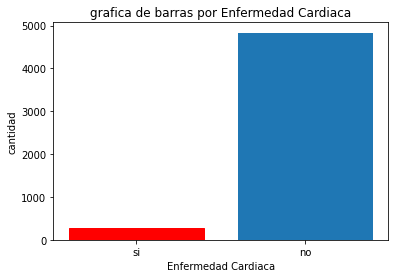

In [0]:
##enfermedades cardiacas
enfCardiaca = df02.groupby('heart_disease').count().select('count').rdd.flatMap(lambda x: x).collect()
#plt.hist8clases[:-1], bin = clases, weight = cantidad
categoria = ['si', 'no']
grafica = plt.bar(categoria, enfCardiaca)
grafica[0].set_color('r')
plt.ylabel('cantidad')
plt.xlabel('Enfermedad Cardiaca')
plt.title('grafica de barras por Enfermedad Cardiaca')
#plt.legend(['gender'], loc='upper right')
plt.show()